In [101]:
import numpy as np
import pandas as pd
import os

import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
def load_text_data(file):
    with open(file, "r", encoding='utf-8') as f:
        data = f.readline()
    return data

In [103]:
def get_text_info(datadir):
    text_files = [f for f in os.listdir(datadir) if f.lower().endswith('.txt')]  #Python method listdir() returns a list containing the names of the entries in the directory given by path.
    text_dict = {'text_name':[],'text_detail':[]}
    for text_file in text_files:
        file_temp = "{}{}".format(datadir,text_file)
        text = load_text_data(file_temp)
        text_dict['text_name'].append(text_file)
        text_dict['text_detail'].append(text)
    return text_dict
        

In [104]:
get_text_info("D:\\200_Annotated_Files\\Consolidated\\")

{'text_name': [], 'text_detail': []}

In [105]:
df = pd.DataFrame(get_text_info("D:\\200_text_files\\"))
df.head(5)

,text_name,text_detail
0,- Master Service Agreement - 10-18-2021 - 10-1...,docusign envelope id 56161aae-63e6 4b58 b11d-4...
1,0000000 - SFA - 09-22-2021 - 09-21-2023.txt,docusign envelope id 25339dca-2b39 4bf3 9ba2 3...
2,1031717-NGA-MSA-010119-123122.txt,docusign envelope id 39a25b39 9e3a-4775 bd1d-2...
3,1044256-NGA-MSA-110618-110621.txt,docusign envelope id df4551b5 508f-4cca be93 e...
4,1044256-NGA-MSA-110618-1106211.txt,docusign envelope id df4551b5 508f-4cca be93 e...


In [106]:
df.shape

(200, 2)

In [107]:
import re
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

df['text_detail'] = df.text_detail.map(preprocess)
df

,text_name,text_detail
0,- Master Service Agreement - 10-18-2021 - 10-1...,docusign envelope id aae e b bd db e n alight...
1,0000000 - SFA - 09-22-2021 - 09-21-2023.txt,docusign envelope id dca b bf ba fbe dda suppl...
2,1031717-NGA-MSA-010119-123122.txt,docusign envelope id ab ea bdd beedc zz human...
3,1044256-NGA-MSA-110618-110621.txt,docusign envelope id dfb f cca be ea afe y hu...
4,1044256-NGA-MSA-110618-1106211.txt,docusign envelope id dfb f cca be ea afe y hu...
...,...,...
195,VANGUARD SYSTEMS INC-Master Software License A...,vanc integrity professional west chapman suit...
196,VELOCITY SOFTWARE INC-Master Software License ...,program product license agreement licensee add...
197,VERINT AMERICAS INC-Master Software License Ag...,verint master software license service support...
198,vFairs_-_MSA_FINAL.txt,docusign envelope id c d bd d c master servic...


In [108]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

df['text_detail'] = df.text_detail.map(remove_stopwords)
df

,text_name,text_detail
0,- Master Service Agreement - 10-18-2021 - 10-1...,docusign envelope id aae e b bd db e n alight ...
1,0000000 - SFA - 09-22-2021 - 09-21-2023.txt,docusign envelope id dca b bf ba fbe dda suppl...
2,1031717-NGA-MSA-010119-123122.txt,docusign envelope id ab ea bdd beedc zz human ...
3,1044256-NGA-MSA-110618-110621.txt,docusign envelope id dfb f cca ea afe human co...
4,1044256-NGA-MSA-110618-1106211.txt,docusign envelope id dfb f cca ea afe human co...
...,...,...
195,VANGUARD SYSTEMS INC-Master Software License A...,vanc integrity professional west chapman suite...
196,VELOCITY SOFTWARE INC-Master Software License ...,program product license agreement licensee add...
197,VERINT AMERICAS INC-Master Software License Ag...,verint master software license service support...
198,vFairs_-_MSA_FINAL.txt,docusign envelope id c bd c master service agr...


In [109]:
import matplotlib.pyplot as plt

In [110]:
feature = df['text_detail'].values.astype("U")

In [111]:
text_to_vector = TfidfVectorizer(lowercase=True)
text_to_vector

TfidfVectorizer()

In [112]:
feature = text_to_vector.fit_transform(feature)
feature

<200x29539 sparse matrix of type '<class 'numpy.float64'>'
	with 294086 stored elements in Compressed Sparse Row format>

In [113]:
# embeddings.shape

In [114]:
# silhauette analysis
range_in_cluster = [2,3,4,5,6,7,8]

for num_cluster in range_in_cluster:
    kmeans = KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(feature)
    cluster_labels = kmeans.labels_
    silhoute_avg = silhouette_score(feature,cluster_labels)
    print("For num of cluster={0},the silhouette score is {1}".format(num_cluster,silhoute_avg))

For num of cluster=2,the silhouette score is 0.1133623707041212
For num of cluster=3,the silhouette score is 0.10367890956891417
For num of cluster=4,the silhouette score is 0.11393611855281793
For num of cluster=5,the silhouette score is 0.14734126612271917
For num of cluster=6,the silhouette score is 0.16409253965756118
For num of cluster=7,the silhouette score is 0.17190120841231504
For num of cluster=8,the silhouette score is 0.16979601922222906


In [115]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(feature)

KMeans(max_iter=50, n_clusters=5)

In [116]:
kmeans.labels_

array([2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 1, 2, 4, 4, 1, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 4, 4, 2, 1, 4, 2,
       4, 2, 1, 4, 3, 4, 4, 4, 1, 1, 3, 3, 2, 4, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 1, 2, 4, 4, 1, 4, 4, 2, 3, 4, 3, 4, 4, 2, 1, 2, 4, 4,
       3, 4, 4, 2, 4, 4, 0, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 1, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2,
       4, 3, 2, 4, 4, 4, 1, 4, 4, 4, 2, 4, 2, 1, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 1, 4, 4, 4, 2, 2, 3, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       2, 4])

In [117]:
df['cluster_label'] = kmeans.labels_

In [118]:
df

,text_name,text_detail,cluster_label
0,- Master Service Agreement - 10-18-2021 - 10-1...,docusign envelope id aae e b bd db e n alight ...,2
1,0000000 - SFA - 09-22-2021 - 09-21-2023.txt,docusign envelope id dca b bf ba fbe dda suppl...,2
2,1031717-NGA-MSA-010119-123122.txt,docusign envelope id ab ea bdd beedc zz human ...,3
3,1044256-NGA-MSA-110618-110621.txt,docusign envelope id dfb f cca ea afe human co...,3
4,1044256-NGA-MSA-110618-1106211.txt,docusign envelope id dfb f cca ea afe human co...,3
...,...,...,...
195,VANGUARD SYSTEMS INC-Master Software License A...,vanc integrity professional west chapman suite...,4
196,VELOCITY SOFTWARE INC-Master Software License ...,program product license agreement licensee add...,4
197,VERINT AMERICAS INC-Master Software License Ag...,verint master software license service support...,4
198,vFairs_-_MSA_FINAL.txt,docusign envelope id c bd c master service agr...,2


In [119]:
df['cluster_label'].unique()

array([2, 3, 4, 1, 0])

In [120]:
df0=df[df.cluster_label==0]
df1=df[df.cluster_label==1]
df2=df[df.cluster_label==2]
df3=df[df.cluster_label==3]
df4=df[df.cluster_label==4]

In [121]:
os.chdir('D:\\200_Annotated_Files\\Consolidated\\new\\')
df0.to_excel("class0.xlsx")
df1.to_excel("class1.xlsx")  
df2.to_excel("class2.xlsx")  
df3.to_excel("class3.xlsx")  
df4.to_excel("class4.xlsx")

In [122]:
print("Class 0:", df0['cluster_label'].value_counts())
print("Class 1:", df1['cluster_label'].value_counts())
print("Class 2:", df2['cluster_label'].value_counts())
print("Class 3:", df3['cluster_label'].value_counts())
print("Class 4:", df4['cluster_label'].value_counts())

Class 0: 0    1
Name: cluster_label, dtype: int64
Class 1: 1    18
Name: cluster_label, dtype: int64
Class 2: 2    45
Name: cluster_label, dtype: int64
Class 3: 3    17
Name: cluster_label, dtype: int64
Class 4: 4    119
Name: cluster_label, dtype: int64


In [123]:
range_in_cluster = [2,3,4,5,6,7,8,10,12,14]
ssd = {"num_cluster":[],"variance":[]}
for num_in_cluster in range_in_cluster:
    kmeans = KMeans(n_clusters=num_in_cluster,max_iter=50)
    kmeans.fit(feature)
    ssd["num_cluster"].append(num_in_cluster)
    ssd["variance"].append(kmeans.inertia_)

In [99]:
ssd

{'num_cluster': [2, 3, 4, 5, 6, 7, 8, 10, 12, 14],
 'variance': [141.80188379840828,
  134.26070299548638,
  129.15779500165837,
  121.33915961003396,
  119.4687927963756,
  116.10001710966269,
  113.59188500757413,
  111.6559739197023,
  107.59179440725052,
  103.97696140937217]}

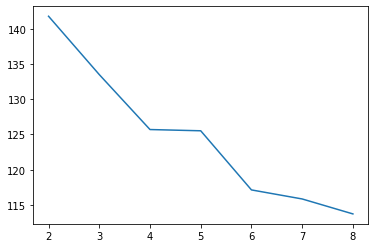

In [100]:
import matplotlib.pyplot as plt
range_in_cluster = [2,3,4,5,6,7,8]
num_cluster_temp=[]
variance = []
for num_in_cluster in range_in_cluster:
    
    kmeans = KMeans(n_clusters=num_in_cluster,max_iter=50)
    kmeans.fit(feature)
    num_cluster_temp.append(num_in_cluster)
    variance.append(kmeans.inertia_)    
plt.plot(num_cluster_temp,variance)

In [80]:
file_list = df0["text_detail"].tolist()

In [81]:
len(file_list)

30

In [112]:
df0['text_name']

16                                MSA signature page.txt
17                                MT SP Agt 05-13-09.txt
21     NEWSWEAVER-Master Service Agreement-Master Ser...
24                   NobleSystems-Cloud Services-MSA.txt
25                 NobleSystems-Telecom Services-MSA.txt
27     NorthgateArinso - e-know - Web Services Agreem...
28            NorthgateArinsoMSAandSOW_signed6-22-10.txt
29                                      ON24 INC MSA.txt
30     ONIT INC-Master Service Agreement-Application ...
32                                 OPENPRISE INC MSA.txt
33     OPINIONLAB-Master Software License Agreement-O...
34                      OPTIMAL WORKSHOP LIMITED MSA.txt
35                                  Optiv-Alight-MSA.txt
37       Outsourcing Services Agreement 4.08.05 Best.txt
38     PALOMA PRODUCT MARKETING-Master Software Licen...
39     PARASOFT CORPORATION-Master Software License A...
41                           Peopleclick MSA_6.29.07.txt
42       People_First_Next_Gene

In [113]:
os.chdir('D:\\113_files\\Files\\')
counter = 0
for i in file_list:
    print(df0['text_name'][i])
    break
    with open(df0['text_name'][i], 'w') as f:
        f.write(i)
        counter+=1

KeyError: 'docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 e n alight supplier framework agreement supplier framework agreement supplier framework agreement effective october 18 2021 effective date 2win global llc principal place business 119 s. prospect street colorado springs colorado 80903 usa supplier alight solutions llc principal place business 4 overlook point lincolnshire il 60069 alight supplier party collectively parties consideration mutual covenants contained valuable consideration receipt sufficiency acknowledged parties agree follows section1 contractual framework supplier framework agreement framework arrangement sets forth terms order defined supplier framework agreement establish rights obligations liabilities extent terms supplier framework agreement incorporated order case terms shall binding parties order order may entered parties supplier framework agreement respective affiliates references alight supplier partyies supplier framework agreement shall refer applicable entities entered order purposes thereof references supplier framework agreement agreement shall refer order supplier framework agreement incorporated agreement separate severable agreement applicable parties thereto party shall solely responsible obligations thereunder section 2 orders 2.1 placement orders alight affiliates may place order supplier products software services referencing supplier framework agreement clarity order means transactional document parties referencing supplier framework agreement detailing alight procuring supplier e.g. duly executed order form statement work sow purchase quote 2.2 change orders party may request changes order subject mutual agreement parties agree proceed change written change order change order describing change including impact change work services scope specifications volumes licenses timeline fees etc shall prepared supplier submitted alight review clarity change orders result de minimus changes order supplier charge alight additional fees order party responsible costs associated developing change order mutually agreed effective supplier implement change order change order shall identified duly executed approved mutually agreed method authorized representative party change order shall deemed amendment agreement section 3 compensation 3.1 fees fees payable connection order shall set forth applicable order specifically stated order alight shall pay fees 60 days receipt undisputed invoice alight responsible fees invoiced hundred eighty 180 days delivery applicable products software services 3.2 taxes alight responsible pay taxes duties charges including sales use taxes imposed federal state local governmental entity invoiced supplier arising directly agreement including vat taxes applicable excluding taxes supplier s taxable income gross revenue employment obligations 3.3 expenses order seek reimbursement expenses included order supplier seek receive approval writing alight prior incurring expenses expenses invoiced alight cost supplier mark submitted consistent alight expense guidelines located htips://alight.com/alightreimbursementquidelines 01779293 2 supplier framework agreement 1 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 1 supplier data privacy agreement supplier data privacy agreement dpa effective october 18 2021 effective date alight solutions llc alight 2win global llc supplier alight party collectively parties dpa entered connection services provided supplier alight services certain supplier framework agreement effective october 18 2021 parties sfa pursuant supplier may required process personal information defined references dpa agreement shall refer order defined sfa inclusive terms sfa order may time time identified work order statement work sow consideration mutual covenants contained valuable consideration receipt sufficiency acknowledged parties agree follows section1 definitions 1.1 controller means natural legal person public authority agency body jointly determines purposes means processing personal data purposes means processing determined european union eu member state law controller specific criteria nomination may provided european union eu member state law 1.2 data protection laws means applicable laws regulations privacy security data protection including limited california consumer privacy act 2018 ccpa health insurance portability accountability act 1996 hipaa eu general data protection regulation 2016/679 gdpr gramm leach bliley act glba uk data protection act 2018 new york department financial services regulations state province national laws regulations may apply amended repealed replaced use data protection laws means collectively combination single law regulation 1.3 data subject means respect personal information subject personal information 1.4 personal information means information data processed supplier relates identified identifiable natural person identifiable natural person identified directly indirectly information data combination information data processed behalf supplier particular reference identifier identification number location data online identifier factors specific physical physiological genetic mental economic cultural social identity natural person b protected data protection laws 1.5 processing processes means operation set operations performed personal information sets personal information automated means including collection storage adaptation alteration retrieval use disclosure erasure destruction b activity involving personal information included definition processing data protections laws 1.6 processor means natural legal person public authority agency body processes personal data behalf controller 1.7 restricted transfer means transfer personal information european union eu european economic area eea country recognized european commission providing adequate level protection 1.8 standard contractual clauses sccs means eu standard contractual clauses transfer personal data eu eea countries successor documents transfer 01779293 2 supplier framework agreement 10 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 mechanisms effective date reference sccs means applicable module commission implementing decision eu 2021/914 1.9 subprocessor means person employee entities including supplier affiliates appointed behalf supplier process personal information behalf alight section 2 processing personal information 2.1 instructions limits processing alight appoints instructs supplier process personal information purposes providing services goods sofware behalf alight complying applicable law complying instruction provided behalf alight purpose purpose business purpose defined ccpa supplier processes personal information behalf alight clients supplier act processor instructions client alight client alight controller alight shall client instructions available supplier prior processing supplier processes personal information alight acts processor alight alight controller supplier processes personal information behalf alight shall process personal information accordance documented instructions may given duration order supplier shall collect retain use disclose process personal information purpose shall sell personal information term commonly understood sell defined ccpa data protection laws supplier shall immediately notify alight supplier s opinion instruction provided behalf alight violates data protection law personal information disclosed supplier behalf alight provided supplier supplier shall process personal information business purpose supplier certifies understands comply limits processing set forth section 2 including subpart 2.1 subparts section 2 alight instructions supplier comply data protection laws alight shall sell personal information supplier 2.2 limits disclosure supplier shall disclose personal information party necessary fulfill purpose accordance dpa supplier representatives requested required disclose process personal information law legal process including judicial authorities supplier shall permitted law promptly notify alight reasonably cooperate alight efforts obtain appropriate protective order remedy 2.2.1 notification shall include information personal information requested b requesting authority c legal basis request d response provided 2.2.2 supplier aware direct access public authorities personal information supplier inform alight immediately undue delay information available supplier shall update alight regular intervals aware additional information permitted applicable law 2.2.3 supplier prohibited notify alight accordance applicable law supplier agrees use best efforts obtain waiver prohibition view communicating information possible soon possible alight supplier agrees document best efforts order demonstrate request alight 2.2.4 supplier shall circumstances regardless permitted notify alight review assess legality request challenge request deems reasonable grounds consider request unlawful applicable law shall seek 01779293 2 supplier framework agreement 11 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 measures view suspending effects request review assessment challenge shall documented available alight competent authority request 2.2.5 despite supplier s best efforts disclosure personal information avoided supplier shall provide disclose minimum personal information responding request disclosure 2.2.6 supplier shall preserve information pursuant section 2.2.1 2.2.5 duration order 2.3 compliance data protection laws party shall comply obligations data protection laws supplier shall provide reasonable assistance alight client alight meeting obligations data protection laws relation processing personal information taking account nature supplier s processing information available supplier 2.4 data subject rights supplier shall promptly notify alight receives request data subject asserting rights data protection laws respect personal information supplier respond request instructions alight required data protection laws case supplier shall extent permitted data protection laws inform alight requirement prior response supplier provide alight reasonable assistance efforts fulfill obligations respond requests including providing access information deleting modifying relevant personal information case extent required accordance data protection laws supplier unable provide assistance reasons permitted data protection laws supplier shall promptly notify alight fact shall provide assistance promptly reasons expired 2.5 return destruction written request alight following termination expiration order supplier shall shall require subprocessors return complete copy personal information alight secure file transfer supplier s customary format b delete render permanently anonymous copies personal information supplier shall comply written request five 5 business days required data protection laws supplier subprocessors may retain personal information necessary fulfill purpose comply applicable law case terms dpa shall continue apply personal information long retained 2.6 recordkeeping supplier shall accurate date records processing personal information including records access security personal information purposes categories processing personal information subprocessors b records required data protection laws 2.7 employees personal information shall accessed supplier s employees personnel require access assist supplier connection purpose restricted applicable local laws supplier subject new employees comprehensive pre employment background check accordance local laws customs supplier require written agreements include non- disclosure confidentiality provisions signed new employees prior work behalf supplier conduct services supplier periodically provide employees comprehensive data security privacy training year 2.8 subprocessors supplier shall subcontract processing prior authorization alight certain cases prior authorization alight client supplier s approved subprocessors listed exhibit subprocessors additional supplier subprocessors subject prior written approval alight request additional subprocessors shall submitted twenty 20 business days prior engagement subprocessors supplier shall available materials evidencing subprocessor ability provide level protection personal information required dpa supplier shall remain responsible use disclosure processing personal information subprocessors extent use disclosure processing supplier subprocessor processes personal information supplier carry adequate diligence determine subprocessor capable providing level protection personal information required dpa arrangement supplier subprocessor governed written contract contains 01779293 2 supplier framework agreement 12 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 requirements consistent stringent apply supplier dpa supplier represents maintains vendor security program assesses subprocessors compliance contracts alight written request supplier shall subprocessor data protection terms available alight redacted necessary protect confidential information 2.9 data protection impact assessment prior consultation supplier shall provide assistance alight data protection impact assessments consultations supervising authorities data privacy authorities .. section 3 security measures policies supplier shall implement maintain appropriate physical technical organizational administrative measures reasonably designed protect unauthorized destruction loss access alteration personal information including security measures exhibit b technical organizational measures attached hereto incorporated security measures implemented supplier protect personal information shall consistent stringent required data protection laws ensure level security appropriate harm result data security incident defined nature data protected supplier shall implement maintain written privacy information security policies consistent industry standards dpa section 4 data security incident notification response 4.1 supplier shall notify alight undue delay accordance requirements applicable data protection laws confirmed reasonably suspected breach security supplier subprocessors leading unlawful unauthorized access alteration destruction disclosure loss personal information data security incident 4.2 event data security incident supplier shall undue delay investigate impact data security incident b identify root cause data security incident c remedy data security incident d prevent reoccurrence data security incident 4.3 supplier provide alight undue delay information nature consequences data security incident extent known supplier including information necessary allow alight notify relevant parties accordance data protection laws supplier shall update alight regular intervals new updated information involved data security incident section5 audits notwithstanding provision order agreements may exist parties contrary alight may expense reasonable advance notice supplier audit supplier s books records documents extent necessary verify supplier s compliance terms dpa provided alight may exercise audit rights hereunder time calendar year required client alight follow audit discovery non compliance issue required law connection audit initiated governmental entity having jurisdiction alight client alight audit shall occur normal business hours shall unreasonably interfere supplier s normal business operations supplier shall required disclose provide access information disclosure cause supplier violate confidentiality obligation applicable law alight may engage party conduct audit long party competitor supplier enters confidentiality agreement audits dpa shall subject additional terms conditions audits order conflict terms section 5 section6 details processing certain information supplier s processing personal information required article 283 gdpr set forth exhibit c details processing attached hereto incorporated alight may reasonable amendments exhibit c notice supplier time time alight reasonably considers necessary meet requirements section 7 restricted transfers parties anticipate restricted transfer alight supplier agree enter sccs alight data exporter supplier data importer applicable sccs shall come effect commencement restricted transfer shall reference incorporated dpa event conflict inconsistency dpa sccs extent 01779293 2 supplier framework agreement 13 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 conflict inconsistency sccs shall prevail parties confirm exhibit c shall deemed annex 1 sccs security measures taken set forth exhibit b shall deemed annex 2 sccs section 8 hipaa protected health information defined hipaa created received maintained transmitted behalf supplier alight supplier alight shall execute hipaa business associate agreement baa alight determination baa necessary shall executed parties set forth exhibit d business associate agreement incorporated dpa event conflict inconsistency dpa exhibit d extent conflict inconsistency exhibit c shall prevail respect matters section9 alight affiliates clients terms dpa shall apply equally personal information processed behalf supplier alight affiliate client section 10 term effect termination term dpa shall begin effective date shall continue long order remains effect supplier subprocessors possesses retains personal information rights obligations parties nature survive termination expiration dpa shall survive termination expiration section11 miscellaneous 11.1 entire agreement dpa shall deemed incorporated sfa extent conflict inconsistency dpa sfa dpa shall supersede sfa purposes dpa expressly provided dpa terms provisions sfa remain force effect ratified confirmed parties dpa sfa constitutes sole entire agreement parties respect subject matter hereof thereof supersedes prior contemporaneous understandings agreements representations warranties written oral respect subject matter avoidance doubt claims liabilities arising related dpa shall brought subject terms sfa including provisions indemnification limitation liability dispute resolution choice law choice forum 11.2 severability provision dpa application thereof person place circumstance shall held court competent jurisdiction invalid void unenforceable remainder dpa provision applied persons places circumstances shall remain force effect invalid void unenforceable provision shall enforced fullest extent permitted law 11.3 amendment waiver parties agree reasonable actions necessary amend dpa time time necessary parties comply data protection laws dpa may amended modified amendment modification set forth writing identified amendment modification dpa signed authorized representative parties provision dpa may waived waiver set forth writing identified waiver dpa signed authorized representative waiving party provided dpa failure delay party exercising right dpa shall operate waiver thereof shall single partial exercise thereof preclude exercise thereof exercise right 11.4 assignment party may assign dpa rights prior written consent non assigning party purported assignment consent shall void unenforceable provided party may obtaining consent assign dpa assignment pursuant accordance sfa 11.5 party beneficiaries dpa shall binding inure benefit parties respective successors permitted assigns respect alight affiliates express implied intended shall confer person legal equitable right benefit remedy nature whatsoever reason dpa 11.6 relationship parties relationship parties independent contractors dpa establish agency partnership joint venture fiduciary franchise employment 01779293 2 supplier framework agreement 14 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 relationship parties party representatives party party virtue dpa shall right power authority express implied bind party 11.7 force majeure excused performance notwithstanding contrary dpa supplier shall liable deemed breach dpa result failure comply obligations hereunder act omission extent failure directly attributable failure alight comply material obligations hereunder data protection laws b act omission vendor representative alight supplier subprocessors c act god act circumstance reasonable unforeseeable unavoidable control supplier provided section shall limit affect supplier s obligation execute business continuity disaster recovery program shall place maintain entire duration order parties shall use commercially reasonable efforts mitigate effects foregoing circumstances 11.8 counterparts dpa may executed number counterparts executed delivered shall constitute original counterparts shall constitute instrument dpa may executed delivered electronically 11.9 interpretation ambiguity dpa shall resolved favor meaning permits parties comply data protection laws express context requires words hereof hereunder words similar import refer dpa particular provision dpa references specific section refer sections dpa expressly provided words include including words similar import shall deemed followed words limitation captions headings dpa convenience shall considered affect construction interpretation provision dpa 11.10 notices notices dpa supplier shall sent chrissyc@2winglobal.com cc bobr@2winglobal.com notices dpa alight shall sent legalrequests@alight.com 01779293 2 supplier framework agreement 15 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 witness whereof parties caused dpa duly executed authorized representative effective date 2win global llc alight solutions llc docusigned docusigned daniel conway wate ujma tarnguist laz marta ujma tornquist daniel conway director strategic sourcing title ceo title 10/20/2021 6:41 cdt 10/19/2021 10:28 pm mdt date 01779293 2 supplier framework agreement 16 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 exhibit subprocessors springs co 80903 address processing operations restricted subprocessor subprocessor subprocessor transfer yes tbd 119 s prospect st colorado lms coordinator yes springs co 80903 tbd 119 s prospect st colorado 2win instructor yes 01779293 2 supplier framework agreement 17 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 1 exhibit b — technical organizational measures physical security supplier maintains security controls entry points holding areas telecommunications areas cabling areas contain information processing systems media containing personal information security controls include a. 929 f. access control restriction use defined security perimeter appropriate security barriers security cameras entry controls authentication controls maintenance access logs period time specified law policy system clocks synchronized national international time source supplier id cards deployed requirement personnel vendors contractors visitors wear form visible identification identify employees contractors vendors visitors clear desk clear screen policy automatic idle lock unattended equipment requirement visitors supplier s premises escorted times technically feasible commercially reasonable cameras cctvs 2 business continuity disaster recovery supplier maintains following business continuity controls safeguards a. b. c. d. business continuity disaster recovery program based generally accepted industry practices designed reduce effects significant disruption supplier s operations business continuity disaster recovery programs tested annually backups supplier systems software delivery services replicated disaster recovery facility recovery place disaster data replicated disaster recovery facility providing scheduled point time backup data ensure integrity 3 network security controls supplier maintains following network security controls safeguards a. mo 295 g. h i. j. k. defense depth design perimeter routers network switches firewall devices default deny policy protect internet presence privilege authenticated access network users equipment control internet access proxies two factor authentication remote access non reusable password intrusion detection system monitor respond potential intrusions real time network event logging investigation security information event management tool content filtering website blocking approved lists limitations wireless access network policies standards wireless network devices prohibitions bridging wireless networks including corporate network detection disassociation rogue wireless access points 4 platform security controls supplier maintains following platform security controls safeguards 01779293 2 a. semoaos maintenance configuration hardening standards control changes internal change control process prohibition installing unauthorized hardware software technically feasible automatic session timeouts periods inactivity removal vendor supplied defaults accounts passwords roles installation removal services devices required valid business needs use anti virus program timely updates non privileged account access workstations laptops supplier framework agreement 18 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 disk encryption active firewall installation laptops development test platforms segregated operational platforms providing services development tools compilers assemblers editors general purpose utilities production environment permitted expressly required delivery services case access restricted software hardware delivery services updated line industry standards vendor support security guidelines 5 application security controls supplier maintains following application security controls safeguards a. b. e. defense depth use n tier architecture separation protection data secure software development life cycle ssdlc application development includes training development testing ongoing assessments documentation review testing approval changes implemented production identification testing remediation application vulnerabilities patches timely manner prohibition production data development testing environments 6 data asset management supplier maintains following data asset management security controls safeguards a. b. c. d g- technical administrative physical safeguards regular backups storage personal information encryption personal information transmitted public networks removable media use data loss prevention tool end point data transfer activities involving social security numbers national identification numbers use inventory program control installation ownership movement hardware software communications equipment encryption sanitization destruction purging physical media containing personal information leaving supplier s custody ensure residual magnetic optical electrical representation data deleted recoverable logical separation personal information alight alight client personal information clients supplier 7 access control management supplier maintains following access control management security controls safeguards a9 f. monitoring logging access use supplier systems contain personal information including logging access attempts supplier systems contain personal information regular reviews logs necessary actions protect unauthorized access misuse periodic review validation role based access personal information prompt removal unnecessary access unique logon id passwords strong passwords minimum length complexity expiration requirements disabling access limited number failed login attempts rejection previously passwords 8 risk management supplier maintains following risk management controls safeguards 01779293 2 a. b. information security risk management system aligned iso 27001 standard bs en iso iec 27001 cycle risk assessments critical assets frequency dependent number residual risks identified site risk analysis documented standardized risk assessment templates supplier framework agreement 19 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 section 4 term termination 4.1 term effect termination term supplier framework agreement shall begin effective date shall continue terminated party termination supplier framework agreement shall result termination agreement term agreement shall set forth applicable order termination agreement shall result termination supplier framework agreement agreement rights obligations parties nature survive termination expiration agreement shall survive termination expiration 4.2 termination convenience agreement may terminated convenience thirty 30 days prior written notice provided applicable order termination thirty 30 days notice may result cancellation fees set forth applicable order 4.3 termination cause party may terminate agreement cause party materially breaches terms agreement breach cured 30 days non breaching party delivered notice breach breaching party additionally parties agree supplier breaches service level agreement sla two 2 times five 5 month period alight may termiate agrement cause section 30 days notice right supplier cure breaches 4.4 bankruptcy alight may terminate agreement immediately cancel unfulfilled obligations supplier insolvent unable pay debts files subject bankruptcy receivership forced asset assignment section5 supplier diversity alight seeks include diverse sellers awarding bids goods services identify diverse sellers directly indirectly diverse sellers include businesses owned minorities women disabled persons veterans disabled veterans categorized small disadvantaged businesses diverse sellers certified national regional organization validates diversity status support alight supplier diversity goal supplier provide information supplier diversity program good faith efforts utilize diverse suppliers subcontractors business b submit quarterly reports thirty days following quarter end identify projects services furnished diverse sellers supplier direct support alight account reports shall submitted alight designated provider c document good faith efforts quarter increase support diverse sellers may include annual questionnaire efforts requested alight supplier certified diverse seller national regional organization supplier provide certification alight complete provide forms documentation reasonably requested evidence qualification maintain forms documentation section6 record retention audit supplier agrees maintain accurate books accounts records activities supplier framework agreement orders three 3 years supplier agrees alight designated auditors obligation confidentiality entitled annual basis audit supplier retain copies records term verify compliance supplier obligations supplier framework agreement order alight providing given reasonable prior notice supplier endeavor limit disruption supplier supplier provide reasonable assistance alight designated auditors require conducting audit alight expense event audit identifies supplier s non compliance supplier framework agreement order reasonable cost audit shall supplier s account extent non compliance supplier pay alight overpayments identified audit circumstance supplier engages subcontractor perform activities order supplier agrees include obligation subcontractor comply alight audit requests stringent supplier agrees section section 7 supplier personnel supplier personnel provide products services order including supplier employees contractors skills qualifications perform supplier obligations agreement supplier insure peformed pre employment background check compliance local regualtions principles schedule d background check requirments supplier personnel involved provision products software services agreement 01779293 2 supplier framework agreement 2 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 d. risk management activities established risks defined agreed asset owners 9 vulnerability patch management supplier takes following measures designed identify mitigate vulnerabilities threaten supplier ability enforce confidentiality integrity availability personal information a. vulnerability monitoring process provides alerts notifications new fixes available resulting timeframe remediation b. regular scanning identify remediate vulnerabilities promptly c. classification vulnerabilities based severity allow remediation based predetermined service level expectations d. penetration tests annually prior new release upgrade applicable supplier environments including perimeter vulnerability testing internal infrastructure vulnerability testing application testing 01779293 2 supplier framework agreement 20 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 exhibit c — details processing processing operations processing operations carried dpa follows personal information received behalf alight providing services software order e.g. payroll business process outsourcing services benefits related services software consulting related activities may include limited e providing data processing software equipment services tools applications vendors e storing personal information e preventing unauthorized access modification personal information non personal information e programing printing assembling reviewing modifying statements directed alight communicating data subjects connection services provided alight e providing reference materials requested alight purpose processing operations provide services accordance order data subjects personal information processed supplier behalf alight concern following categories data subjects current and/or prospective employees relatives family members representatives alight alight affiliates clients alight categories personal information processed personal information processed supplier comprise following categories hr employee data may include limited employee identification number contact informationincluding home work address home work telephone numbers mobile telephone numbers web address data home work email address marital status citizenship information date birth gender drivers license information national governmental identification information financial information including salary account balances benefit program information including benefit elections beneficiary information claims information benefit plan account numbers balances date retirement payroll information professional employment information including date hire employment status pay history tax withholding information performance records leave information date termination personal information may transferred behalf alight supplier performing services alight related persons data may include limited date birth gender contact information dependents beneficiaries including home address home work telephone numbers mobile telephone numbers special categories personal information personal information processed supplier may include sensitive personal data including information racial ethnic origin political opinions religious philosophical beliefs trade union membership sex life health genetic biometrics medical records criminal records 01779293 2 supplier framework agreement 21 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 1 ongoing pricing model future service fees service total fee demo2win virtual workshops students charged rate 1,500 usd student discounted standard rate 2,000 usd student 20 students workshop minimum 12 students workshop 1,500 usd student demo2win coaching certifications certified coaches charged rate 6,000 usd certified coach discounted standard rate 8,000 usd coach 6,000 usd coach demo2win virtual ip licenses ip licenses charged rate 750 usd ip license discounted standard rate 1,000 usd ip license 750 usd ip license 2win technology fee licensed user participant students x 20 usd student 20 usd student 01779293 2 supplier framework agreement 22 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 2 business continuity requirements 1 definitions business continuity requirements capitalized terms shall meanings set forth capitalized terms defined business continuity requirements shall meaning assigned agreement bcp means supplier business continuity business resumption plan contact center operations means supplier s essential customer service contact center functions required provide services alight and/or alight client disaster means incident event result supplier unable perform services required agreement and/or sow b services reasonably expected recoverable remedied applicable rtos hereinafter defined recourse bcp rto means recovery time objectives set forth section 8 schedule rpo means recovery point objectives set forth section 8 schedule 2 bcp requirements supplier implement bc include development documentation implementation plan action guide supplier return essential business operations eventually business recovery following disaster ensure ability supplier alight fulfill obligations agreement sow bcp minimally include provisions following identification management membership disaster response recovery teams identification documentation required recovery actions addressed disaster identification availability required resources response capabilities disaster response recovery teams — identification documentation information record requirements protection recoverability status « development implementation processes communicating internally externally following loss existing telecommunications and/or facility access including process addressing media inquiries limit potential risk exposure unofficial disclosure information training disaster response recovery teams performance specific tasks ensuring party support arrangements involved provision services adequate disaster recovery plans 3 data backup recovery supplier use data backup practices technologies support operational disaster recovery supplier maintain acceptable retention data backups ensure acceptable rpos achieved changed application data files operational software backed daily weekly backup included backup scheme files required deliver services 4 data center operations supplier s data center allow rapid comprehensive recovery supplier s systems applications disaster supplier backs data use media media containing data sent off- site daily 5 contact center operations portion bcp address strategies personnel procedures resources supplier use respond long term disruption supplier contact center operations required deliver services resume essential business operations targeted recovery windows 01779293 2 supplier framework agreement 23 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 6 bcp testing 6.1 frequency testing supplier periodically update test certify alight operability bcp conformance standards set forth bcp event twelve 12 month period routinely test supplier simulate disaster verify critical application processing elements available data current tested applications shall support services representative services 6.2 reporting supplier available summary report applicable results test alight 30 business days completion bcp test section 6.1 schedule event results reveal unreasonable risks ability supplier transition performance bcp alight supplier meet discuss agree timeframe retesting correcting defects bcp agree revise bcp manner acceptable alight 6.3 alight participation alight request alight supplier mutually agree level alight participation bcp testing minimum bcp allow representative alight present bcp testing charge alight alight client bcp testing defined business continuity requirements 7 recovery supplier implement bcp declaration disaster objective recovering critical functions rtos rpos set forth based nature services provided purposes section 7 recovery critical functions refers restoration critical functions state content critical functions accessible alight and/or alight clients may require use work alternative service provided supplier recovery critical functions require critical functions perform strict accordance service levels agreement and/or sow event critical functions substantially usable accessible alight and/or applicable alight client necessary alight supplier mutually agree critical functions systems applicable rtos based applicable systems hosting arrangements criticality 01779293 2 supplier framework agreement 24 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 8 rtos 8.1 supplier hosted supplier system following rtos apply disasters impact systems supplier connection provision services hosted supplier critical functions systems rto rpo data processing services 24 hours completed transactions replicated backed time disaster voice response 24 hours services available and/or completed transactions replicated backed time disaster customer service reps 48 hours ability answer telephone calls access services assist callers client party interfaces 24 hours reestablishment facilities alternative means established enable exchange information 8.2 alight hosted system managed alight premises extent services involve alight hosting software alight systems alight premises supplier managing operation alight software and/or systems supplier use commercially reasonable efforts cooperate alight support alight disaster recovery plan event alight declared disaster 9 contacts alight supplier provide key contact names contact details enable effective communication event supplier invokes bcp response disaster recognized disaster may occur time emergency contact may required time supplier alight provide 24/7 emergency coverage phone pager alight supplier agree inform twenty 24 business hours event change designated emergency contact contact details 10 general supplier fails reinstate material portion services accordance bcp notwithstanding agreement sow alight right perform secure party portion services reinstated recover supplier costs cover providing securing party portion services reinstated 180 days disaster event supplier unable reinstate services 90 days disaster alight may terminate agreement sow agreement breach penalty 30 days written notice supplier event disaster supplier increase fees agreement sow 01779293 2 supplier framework agreement 25 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 3 insurance requirements supplier s sole expense supplier shall maintain entire term order including provision post termination services transition services following insurance companies authorized provide applicable insurance a.m. best s rating vii better comparable rating rating agency insurance coverage limits required maintained supplier shall primary insurance coverage maintained alight client supplier s insurance shall provide coverage employees supplier independent contractors working direction supplier limits shown usd provided currency usd limits equivalent shown usd 1 worker compensation similar social insurance accordance laws country state territory exercising jurisdiction employee minimum limits required law 2 employer liability insurance including coverage occupational injury illness disease minimum limits bodily injury accident 1,000,000 accident bodily injury disease 1,000,000 employee bodily injury disease 1,000,000 policy limit 3 commercial general liability public liability insurance 1,000,000 combined single limit occurrence 2,000,000 aggregate bodily injury property damage policy include coverage liability arising premises operations products completed operations personal advertising injury contractual liability broad form property damage alight subsidiaries affiliates directors officers employees specified clients shall additional insureds supplier s commercial general liability insurance 4 intentionally omitted 5 intentionally omitted 6 professional liability insurance errors omissions insurance 4,000,000 claim damages arising acts errors omissions arising rendering failure render professional services contracted agreement claims policies shall renewed year period two 2 years supplier s completion services shall extended reporting period two 2 years renewed replaced policy retroactive date coincide precede start work services 7 network security privacy liability cyber liability insurance 10,000,000 claim including limited coverage privacy network security liability 1st 3rd party liability wrongful disclosure data wrongful disclosure business confidential information personally identifiable information personal protected health information defined hipaa hitech acts including applicable law breach security including unauthorized access computer system database extortion extortion related threats payments interruption downtime identification theft web hosting applicable regulatory proceedings payment card industry data security standards pci dss fines penalties costs notification costs credit monitoring service claims policies shall renewed year period two 2 years supplier s completion services shall extended reporting period two 2 years renewed replaced policy retroactive date coincide precede start work services 8 intentionally omitted 9 intentionally omitted 01779293 2 supplier framework agreement 26 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 permitted law policies described 1 9 shall contain waiver insurer s right subrogation alight subsidiaries affiliates officers directors employees specified clients supplier financially responsible deductibles self insurance retentions policies supplier shall furnish alight certificates insurance evidencing compliance requirements listed commencing services supplier alight thirty 30 days notice prior cancellation material reduction insurance supplier permit insurance requirements contained lapse supplier cancels insurance policy supplier promptly replace insurance policy lapse coverage supplier ensure subcontractors maintain insurance coverage specified failure supplier provide maintain insurance described constitute material default alight entitled exercise rights remedies hereunder available applicable law insurance coverage limits required minimum requirements way limit liability supplier employees agents subcontractors respective acts omissions 01779293 2 supplier framework agreement 27 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 4 alight supplier code conduct introduction scope alight committed highest standards ethical conduct integrity corporate social responsibility suppliers alight expected conduct business accordance highest standards ethical behavior accordance applicable laws regulations alight policies corporate conduct supplier code supplier code applies suppliers vendors suppliers subcontractors agents providing goods software services directly indirectly alight supplier policy compliance alight may assess supplier compliance supplier code violations supplier code may jeopardize supplier business relationship alight including termination reporting alight ethics helpline alight code conduct outlines ethical standard alight employees officers directors contractors suppliers appropriate agents affiliates partners parties representing alight suppliers expected report suspected wrongdoing alight ethics helpline 1- 844 570 4239 convenient anonymous way suppliers report suspected wrongdoing fear retaliation available 24 hours day 365 days year alternatively appropriate action taken found violated applicable law alight policy treat people right alight believes workers service delivery supply chain deserve fair ethical workplace suppliers shall uphold standards harassment discrimination suppliers promote workplace free discrimination hiring employment practices discriminate based protected status characteristic suppliers provide work environment free form harassment discrimination kind including behavior disrespectful abusive humiliating basis gender race ethnicity religion sexual orientation gender identity national origin age disability pregnancy veteran status marital domestic partner status status protected law diversity equal treatment alight believes including diverse partners business important success expect suppliers identify adopt integrate diversity supply processes hiring including equal treatment minority women owned businesses supplier selection process supplier shall provide equal treatment regard protected status characteristic aspects supplier s employment decisions including recruitment hiring promotion performance development training benefits compensation termination employment maintaining safe healthy workplace suppliers shall provide workers safe healthy workplace complies applicable health safety laws regulations suppliers proactive measures prevent workplace hazards commitment safety means suppliers tolerate threats acts violence including intimidation bullying attempts instill fear 01779293 2 supplier framework agreement 28 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 human rights labor concerns forced child labor suppliers shall engage permit forced labor human trafficking underage labor additionally supplier employ allow employees 15 years old legally required minimum age whichever higher wages suppliers shall provide wages benefits met exceed local legal requirements provide timely manner freedom association collective bargaining supplier shall respect rights workers freely choose join associations organizations trade unions bargain collectively provided local law regulation follow laws policies compliance means observing law conducting corporate business way recognizes fulfills social ethical responsibilities addition specific obligations supplier agreement alight supplier shall adhere following standards anti bribery anti corruption laws alight committed compliance anti corruption laws countries alight operates expects suppliers laws include u.s. foreign corrupt practices act fcpa u.k. bribery act u.s. fraud statutes state laws similar international rules laws prohibit improper payments bribes kickbacks promises improper payments offer successful offering paying soliciting accepting bribes kickbacks strictly prohibited supplier shall promise illegal payment offer value government officials purpose securing improper advantage obtain retain business fair dealing marketing practices alight competes fairly marketplace abides fair competition antitrust laws expects supplier s supplier shall enter agreements express implied violate letter spirit anti competition laws addition supplier shall alter draft agreements alight conceal falsify deal terms expect supplier marketing sales activities alight behalf ethical financial crime anti money laundering anti terrorism laws supplier shall comply financial crime anti money laundering anti terrorism laws jurisdictions business alight conduct business reputable parties engaged legitimate business activities funds derived legitimate sources supplier accept funds known derived illegal activities international trade restrictions supplier shall comply u.s. trade restriction laws regulations including economic sanctions applicable import export rules anti boycott activities expects suppliers import export laws apply goods technology software intellectual property technical information complying applicable international trade restriction economic sanctions laws includes knowingly employing business suspected connected criminal terrorist activities subject economic sanctions accepting giving gifts entertainment supplier shall ensure acceptance business courtesies gifts entertainment personnel proper consistent anti corruption rules supplier shall offer gifts entertainment alight employees time request proposal rfps supplier selection process avoid conflicts 01779293 2 supplier framework agreement 29 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 section 8 confidentiality 8.1 confidential information purposes hereof confidential information means information irrespective form thereof disclosed behalf party applicable disclosing party party applicable receiving party representatives defined connection subject matter hereof marked confidential understood reasonable person position receiving party confidential nature including information disclosing party services supplier ip alight data products systems software marketing pricing operations financial results plans strategies trade secrets know methods personal information defined intellectual property relationship employees prospects customers suppliers parties terms agreement provided personal information defined shall times treated confidential confidential information shall include information generally available public result disclosure thereof receiving party representatives violation hereof b available receiving party source disclosing party representatives receiving party s knowledge prohibited disclosing information pursuant contractual legal fiduciary obligation confidentiality disclosing party c independently developed receiving party representatives use information confidential information hereunder personal information means information processed behalf supplier alight alight s clients connection agreement relates identified identifiable natural person identifiable natural person identified directly indirectly information combination information processed behalf supplier particular reference identifier identification number biometric data location data online identifier factors specific physical physiological genetic mental economic cultural social identity natural person b protected data protection laws defined schedule 1 data privacy agreement 8.2 restrictions receiving party shall release allow release disclosing party s confidential information use disclosing party confidential information purpose exercise rights perform obligations hereunder receiving party shall prior written consent disclosing party disclose disclosing party confidential information unrelated party receiving party affiliates directors officers employees independent contractors advisors subcontractors vendors agents representatives collectively representatives case reasonably require access confidential information assist receiving party exercise rights perform obligations agreement b contractual legal professional fiduciary obligation confidentiality receiving party consistent material respects receiving party obligations confidentiality disclosing party hereunder receiving party shall responsible use disclosure disclosing party confidential information representatives capacity extent use disclosure receiving party permitted hereunder 8.3 required disclosure notwithstanding foregoing receiving party representatives requested required disclose disclosing party confidential information law legal process receiving party shall permitted law promptly notify disclosing party reasonably cooperate disclosing party disclosing party expense efforts obtain appropriate protective order remedy b protective order remedy obtained receiving party representative applicable may disclose portion confidential information legally required disclosed shall use commercially reasonable efforts obtain reasonable assurances confidential treatment available accorded confidential information 8.4 obligations termination subject obligations respect return retention information following termination agreement receiving party shall shall require representatives destroy confidential information possession control receiving party representatives connection agreement provided receiving party representatives shall entitled retain copies confidential information extent necessary comply applicable law litigation bona fide records retention purposes subject ongoing obligations section 8.2 case extent permitted law notwithstanding obligations detailed section supplier 01779293 2 supplier framework agreement 3 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 alight act integrity avoid conflicts may prevent acting best interest clients expect supplier supplier shall disclose actual potential conflicts interest relating activities alight environmental responsibility alight committed providing service manner maintains safe healthy workplace colleagues minimizes potential impact environment supplier operate safe healthy workplace environmentally responsible efficient manner minimize adverse impacts environment supplier abide alight environmental policy communicated supplier time time request provide alight details compliance alight environmental policy percentage suppliers operations covered iso 14001 environmental management system protect alight data care subject terms specific contractual provisions apply supplier shall comply laws regulations security privacy information including personal data personally identifiable information personal health information data protection cross border data transfers addition supplier shall maintain appropriate documents records ensure regulatory compliance training supplier shall maintain training program adequate ensure management employees comply regulatory requirements expectations set forth supplier code supplier shall cooperate alight needed develop maintain employee training programs implement policies topics outlined supplier code supplier shall ensure personnel read comply supplier code associated training depending nature goods services alight may require supplier s personnel certify compliance alight supplier code training topics may include anti sexual harassment anti corruption data privacy including hipaa gdpr applicable data security diversity alight may require training additional topics depending services provided applicable jurisdictions laws reasonable request supplier shall provide alight evidence training assignment completion 01779293 2 supplier framework agreement 30 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 schedule 5 background checks requirements summary alight committed completing comprehensive pre employment background check new hire north america asia pacific apac europe middle east africa emea regions aspires globally accordance local laws customs alight requires supplier follow similar process extent permitted applicable law standards locations globally types background checks conducted globally vary based laws customs applicable countries available infrastructure conducting background checks alight global standard strives meet locations extent permissible including e verification educational credentials employment history criminal history e applicable use national id numbers conduct review e aconsistent means validating eligibility locations e.g. falsification educational credentials disqualifying result locations local legal limits employee notification requirement supplier ensure extent permitted applicable law process place employees required report criminal conviction completion background check supplier extent conviction precluded supplier hiring employee supplier ensure employee engaged provision services products software alight continued page 01779293 2 supplier framework agreement 31 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 standard country checks education report employment report 7 years criminal history 10 years government watch global sanctions enforcement check credit check required role puerto rico ssn trace widescreen plus national criminal search canada education report employment report 7 years credit check required role global criminal search government source media source global sanctions enforcement uk global education global employment 5 years global criminal search global credit search conduct search global sanctions enforcement india education report employment report 5 years global criminal search 7 years address verification global id check global sanctions enforcement check poland global education global employment 5 years global sanctions enforcement ireland global education global employment 5 years global criminal search global credit search conduct search global sanctions enforcement australia education report employment report 5 years global criminal search 7 years 01779293 2 supplier framework agreement 32 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 passport verification global id check global sanctions enforcement check singapore education report employment report 5 years global criminal search 7 years passport verification global id check global sanctions enforcement check hong kong education report employment report 5 years global criminal search 7 years address verification passport verification civil litigation global credit history check professional reference check report global sanctions enforcement check thailand education report employment report 5 years global criminal search 7 years global id check global sanctions enforcement check malaysia education report employment report 5 years global criminal search 7 years global id check global sanctions enforcement check indonesia education report employment report 5 years global criminal search 7 years address verification global id check global sanctions enforcement check 01779293 2 supplier framework agreement 33 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 representatives delete personal information possession control end agreement term 8.5 injunctive relief addition remedy may entitled disclosing party shall entitled seek injunction equitable remedy prevent enjoin breaches section 8 confidentiality receiving party representatives section 9 proprietary rights 9.1 alight data parties subject provisions section 9.3 right title interest including intellectual property rights information materials provided available supplier behalf alight connection herewith shall owned alight alight data clarity data defined available supplier behalf alight alight data alight grants supplier non exclusive royalty free license use alight data solely connection supplier s provision goods services scope order 9.2 deliverables certain orders may define reports records tangible outcomes services provided behalf supplier alight performing services deliverables subject provisions section 9.3 alight shall owner deliverables supplier assigns rights subcontractors may deliverables alight work hire clarity assignment rights includes right alight assign deliverables alight clients alight affiliates deliverables constitute work hire supplier assigns relevant alight title guarantee free party rights shall obtain waivers moral rights deliverables individual may future time entitled 9.3 supplier intellectual property parties right title interest including intellectual property rights elements services deliverables including supplier s training manuals guidebooks training methods training tools texts products books information plans designs templates processes methodologies procedures software materials provided supplier alight pursuant agreement trade names trade secrets templates know methods software information materials existing prior effective date and/or modified pursuant agreement shall owned supplier supplier ip extent supplier ip incorporated deliverables supplier ip shall parties remain sole exclusive property supplier supplier grants alight individual alight attendee live training workshop identified agreement personal non exclusive non transferable license personal educational use reference supplier ip may copied distributed resold translated modified displayed transfered provided agreement authorized workshop attendee may copy reasonable number limited portions supplier ip contained deliverables limited personal reference long alight violate terms supplier framework agreement agreement individual user licensee violation terms aforementioned license individual user license shall perpetual section 10 compliance law party shall comply material respects laws applicable business operations employment personnel supplier agrees comply insure personnel comply alight supplier code conduct detailed schedule 4 alight supplier code conduct section 11 data protection 11.1 data privacy supplier agrees preserve confidentiality integrity accessibility data information obtained performance agreement data administrative technical physical measures conform generally recognized industry standards best practices compliance laws concerning data protection security provide minimum level protection alight data data similar character maintenance secure processing environment includes limited timely application patches fixes updates operating systems applications provided supplier open source support access controls log management rogue device 01779293 2 supplier framework agreement 4 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 detection malicious code protective measures supplier s specific data security requirements detailed schedule 1 data privacy agreement 11.2 business continuity disaster recovery supplier maintain term agreement business continuity business resumption plan complies minimum requirements pursuant business continuity requirements set forth schedule 2 business continuity requirements attached hereto hereof ensure supplier s continued performance supplier framework agreement orders avoidance doubt force majeure events defined described supplier framework agreement shall excuse suppliers performance business continuity requirements section 12 remedies liability 12.1 infringement indemnity subject limitations section 13 supplier agrees indemnify defend hold harmless alight clients affiliates successors assigns respective officers directors employees agents collectively indemnitees claims parties damages liabilities penalties fines losses costs expenses including reasonable attorneys fees collectively losses arising relating claim allegation goods services procured supplier framework agreement order violate misappropriate infringe intellectual property rights misappropriate trade secret party violate terms party software license contained goods services procured supplier framework agreement order goods services procured supplier framework agreement order constitute may constitute infringement violation misappropriation party intellectual property rights and/or alight use thereof may enjoined supplier addition indemnification obligations hereunder shall promptly secure alight rights continue infringing goods services procured order ii perform replace goods services procured order comparable non infringing goods services iii modify goods services procured order non infringing event supplier unable procure aforementioned remedies supplier shall addition indemnification obligations hereunder promptly refund alight amounts paid supplier order goods services procured order subject infringement claim 12.2 general indemnification subject limitations section 13 supplier shall indemnify defend hold harmless indemnitees losses arising relating acts omissions supplier subcontractors employees representatives provision goods services order 12.3 notification rights cooperation alight agrees supplier prompt written notice claim subject indemnification provided alight failure promptly notify supplier shall affect supplier s obligations hereunder extent alight delay prejudices supplier ability defend claim supplier shall right defend claim counsel choosing settle claim supplier deems appropriate provided supplier shall enter settlement adversely affects alight rights alight prior written consent alight agrees reasonably cooperate supplier defense settlement claim supplier s expense section 13 limitation liability indemnities detailed section 12breaches confidentality obligations section 8breaches data privacy obligations section 11 violations compliance law obligations section 10 gross negligence wilful misconduct party event party liable incidental indirect special consequential damages claim arising supplier framework agreement order regardless cause action party advised possibility damages b liable party amounts excess 2x amounts paid payable sfa event causing liability arises proceeding twelve month period giving rise claim 01779293 2 supplier framework agreement 5 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 section 14 representations warranties party represents warrants requisite corporate power authority undertake perform duties obligations supplier framework agreement orders b duly constituted validly existing good standing laws jurisdiction formation c executing supplier framework agreement orders party violate agreement party d comply applicable laws regulations related provision goods services supplier framework agreement orders e actions suits proceedings investigations adverse decision ruling finding impair ability perform duties obligations supplier framework agreement orders f comply warranties detailed applicable order section 15 insurance supplier s sole expense supplier maintain insurance coverage specified schedule 3 insurance requirements term supplier framework agreement two 2 years section 16 dispute resolution parties shall use good faith efforts resolve dispute claim proceeding arising relating supplier framework agreement orders discussion representatives identified order event disputes resolved level senior executives relevant parties authority settle dispute shall use good faith efforts resolve contained prevent party seeking injunctive relief actual threatened breaches court competent jurisdiction section17 miscellaneous 17.1 entire agreement agreement change order order exhibits schedules referenced constitutes sole entire agreement parties respect subject matter hereof thereof supersedes prior contemporaneous understandings agreements representations warranties written oral respect subject matter 17.2 severability provision agreement application thereof person place circumstance shall held court competent jurisdiction invalid void unenforceable remainder agreement provision applied persons places circumstances shall remain force effect invalid void unenforceable provision shall enforced fullest extent permitted law 17.3 amendment waiver supplier framework agreement agreement may amended modified amendment modification set forth writing identified amendment modification thereof duly executed authorized representative applicable parties provision supplier framework agreement agreement may waived waiver set forth writing identified waiver thereof signed authorized representative waiving party amendment waiver supplier framework agreement shall effect agreement effect time amendment waiver agreed applicable parties amendment waiver agreement shall effect supplier framework agreement agreement provided agreement failure delay party exercising right agreement shall operate waiver thereof shall single partial exercise thereof preclude exercise thereof exercise right 17.4 assignment alight may assign supplier framework agreement agreement rights obligations supplier framework agreement agreement consent supplier supplier may assign supplier framework agreement agreement 01779293 2 supplier framework agreement 6 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 including affiliate prior written consent alight purported assignment consent shall void unenforceable 17.5 sub contracting alight approved subcontractors specifically stated order alight provides specific written approval subcontractor supplier may engage subcontractors parties perform portion services alight approve supplier s engagement subcontractors supplier shall remain responsible performance extent activities agreement performed supplier 17.6 party beneficiaries agreement shall binding inure benefit parties respective successors permitted assigns express implied intended shall confer person legal equitable right benefit remedy nature whatsoever reason agreement 17.7 relationship parties supplier independent contractor alight agreement establish agency partnership joint venture fiduciary franchise employment relationship parties party representatives party supplier virtue agreement shall right power authority express implied bind alight express obligations hereunder method manner performance services shall exclusive control supplier 17.8 choice law supplier framework agreement agreement dispute claim arising connection therewith subject matter formation thereof including non contractual disputes claims shall governed construed accordance laws illinois united states regard conflict law principles cause application laws jurisdiction party irrevocably unconditionally agrees commence action litigation proceeding kind whatsoever party way arising relating supplier framework agreement agreement subject matter formation thereof including non contractual disputes claims forum nation alight office located set expressly irrevocably submits exclusive personal jurisdiction venue courts purposes thereof expressly waives claim improper venue claim courts inconvenient forum 17.9 force majeure notwithstanding contrary party shall liable deemed breach hereof result failure comply obligations hereunder extent attributable act god flood fire earthquake hurricane act war hostility act terrorism governmental action inaction civil unrest national emergency epidemic pandemic strike labor dispute act omission party party product service power telecommunication service outage cause circumstance reasonable control party force majeure events provided section shall limit affect supplier s obligation execute business continuity disaster recovery program affected party shall party prompt notice event use commercially reasonable efforts end minimize effects parties shall use commercially reasonable efforts mitigate effects foregoing circumstances 17.10 counterparts supplier framework agreement order may executed number counterparts executed delivered shall constitute original counterparts shall constitute instrument supplier framework agreement order may executed delivered electronically 17.11 interpretation express context requires words hereof hereunder words similar import refer agreement particular provision agreement references specific section exhibit schedule supplier framework agreement order refer sections exhibits schedules supplier framework agreement orderas applicable expressly provided words include including words similar import shall deemed followed words limitation change order exhibits schedules referenced incorporated agreement set forth captions headings agreement convenience shall considered affect construction interpretation provision agreement 01779293 2 supplier framework agreement 7 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 17.12 hierarchy conflict term supplier framework agreement term order term order shall control extent conflict 17.13 deliberately omitted 17.14 notices notices agreement shall writing shall deemed given business day sent sent overnight courier service provided delivery confirmed actually received sent means case address applicable party written case notices alight attention legal dept follows attn general counsel alight solutions llc 4 overlook point lincolnshire il 60069 email address legalrequests@alight.com address shall specified agreement notice delivered accordance herewith 17.15 publicity supplier shall publicize supplier framework agreement order additionally supplier shall use manner trademarks alight alight affiliate prior written approval alight 01779293 2 supplier framework agreement 8 docusign envelope id 56161aae-63e6 4b58 b11d-4075db371811 index schedules schedule 1 supplier data privacy agreement schedule 2 business continuity requirements schedule 3 insurance requirements schedule 4 alight supplier code conduct schedule 5 background check requirements witness whereof parties caused supplier framework agreement duly executed effective date 2win global llc alight solutions llc docusigned daniel conway docusigned warta ajime- ternguiat a7f0025da7eca01 ... marta ujma tornquist daniel conway title ceo title director strategic sourcing 10/20/2021 6:41 cdt 10/19/2021 10:28 pm mdt date date 01779293 2 supplier framework agreement 9'

In [83]:
file1_list = df1["text_detail"].tolist()

In [84]:
len(file1_list)

59

In [85]:
os.chdir('D:\\113_files\\2\\')
counter = 30
for i in file1_list:
    with open(str(counter)+'.txt', 'w') as f:
        f.write(i)
        counter+=1

In [114]:
df0['text_name']

16                                MSA signature page.txt
17                                MT SP Agt 05-13-09.txt
21     NEWSWEAVER-Master Service Agreement-Master Ser...
24                   NobleSystems-Cloud Services-MSA.txt
25                 NobleSystems-Telecom Services-MSA.txt
27     NorthgateArinso - e-know - Web Services Agreem...
28            NorthgateArinsoMSAandSOW_signed6-22-10.txt
29                                      ON24 INC MSA.txt
30     ONIT INC-Master Service Agreement-Application ...
32                                 OPENPRISE INC MSA.txt
33     OPINIONLAB-Master Software License Agreement-O...
34                      OPTIMAL WORKSHOP LIMITED MSA.txt
35                                  Optiv-Alight-MSA.txt
37       Outsourcing Services Agreement 4.08.05 Best.txt
38     PALOMA PRODUCT MARKETING-Master Software Licen...
39     PARASOFT CORPORATION-Master Software License A...
41                           Peopleclick MSA_6.29.07.txt
42       People_First_Next_Gene

In [117]:
df1['text_name']

2                      1031717-NGA-MSA-010119-123122.txt
3                      1044256-NGA-MSA-110618-110621.txt
4                     1044256-NGA-MSA-110618-1106211.txt
5                      1044542-NGA-MSA-031819-031820.txt
8                                ASAP_Staffing_-_SFA.txt
10                         BLUEWAVE SELECT LTD - MSA.txt
11                         Freemont Associates - SFA.txt
12                      Imbri Resourcing 1042908 MSA.txt
13                                       Infocom SFA.txt
14              LEADINGDEV SOLUTIONS SL. 1044585 SFA.txt
15                               LM Consulting - SFA.txt
22     NGA-Empower Agreement Dec 30, 2014 - Fully Exe...
23               NGAUS-EXXOVA MSA - FINAL 12-04-2009.txt
68                   SFA_Age_of_Human_202100807.docx.txt
100                                  Topic SRL - MSA.txt
Name: text_name, dtype: object

In [118]:
df0['text_name'].to_excel("output1.xlsx")  
df3['text_name'].to_excel("output2.xlsx")  

In [147]:
# silhauette analysis
range_in_cluster = [2,3,4,5,6,7,8]

for num_cluster in range_in_cluster:
    kmeans = KMeans(n_clusters=6,max_iter=50)
    kmeans.fit(feature)
    cluster_labels = kmeans.labels_
    silhoute_avg = silhouette_score(feature,cluster_labels)
    print("For num of cluster={0},the silhouette score is {1}".format(num_cluster,silhoute_avg))

For num of cluster=2,the silhouette score is 0.14101644310966935
For num of cluster=3,the silhouette score is 0.1527780952375977
For num of cluster=4,the silhouette score is 0.16636083931422213
For num of cluster=5,the silhouette score is 0.16636083931422213
For num of cluster=6,the silhouette score is 0.16104472769067243
For num of cluster=7,the silhouette score is 0.15889666715924802
For num of cluster=8,the silhouette score is 0.15599200740725225
